In [273]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit
from lab_helper import *

In [274]:
electron = 1.6 * 10**-19
m_electron = 9.11 * 10**-31
U0 = 2.5 * electron # eV
h_plank = 6.626 * 10**-34

Vmax = 1.6
Vmin = 5.8

In [275]:
data = [
    (0.293, 0.17),
    (0.618, 2.96),
    (0.904, 28.38),
    (1.201, 93.0),
    (1.502, 159.84),
    (1.570, 170.32),
    (1.647, 175.57),
    (1.704, 178.64),
    (1.730, 178.51),
    (1.809, 178.12),
    (1.926, 174.20),
    (2.059, 165.93),
    (2.345, 147.30),
    (2.732, 127.54),
    (3.126, 111.93),
    (3.497, 101.96),
    (3.789, 99.69),
    (4.174, 89.79),
    (4.546, 85.64),
    (4.804, 84.28),
    (5.000, 82.47),
    (5.210, 81.65),
    (5.440, 81.13),
    (5.670, 81.03),
    (5.771, 81.08),
    (6.000, 81.58),
    (6.320, 82.48),
    (6.547, 84.42),
    (6.942, 87.74),
    (7.350, 92.53),
    (7.825, 100,16),
    (8.260, 109.34),
    (9.000, 129.99),
    (9.500, 145.47),
    (10.05, 179.45)
]

U = 2.990

data_katod = [x[0] for x in data]
data_anod = [x[1] for x in data]

katod_err = 0.01
anod_err = 0.1



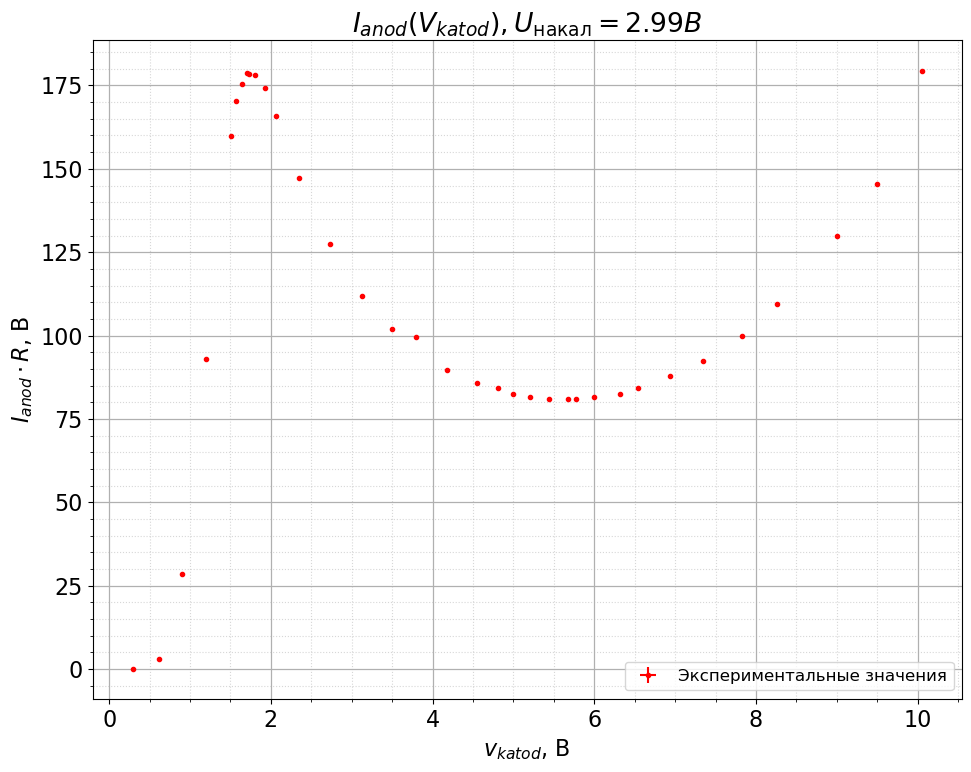

In [276]:
plot_data("I(V)", "$I_{anod}(V_{katod}), U_{\\text{накал}} = 2.99 В$", "$v_{katod}$, В", "$I_{anod} \\cdot R$, В", [x[0] for x in data], [x[1] for x in data], [katod_err] * len(data), [anod_err] * len(data))

In [277]:
def fit_parabola(x, y):
    coeffs = np.polyfit(x, y, 2)  # ax^2 + bx + c
    p = np.poly1d(coeffs)
    x_vertex = -coeffs[1] / (2 * coeffs[0])
    y_vertex = p(x_vertex)
    residuals = y - p(x)
    error = np.sqrt(np.mean(residuals**2))
    return p, x_vertex, y_vertex, error

In [278]:
def get_extremum(x, y):
    p, x_, y_, err = fit_parabola(x, y)
    print("x = ", x_, "y = ", y_)
    return x_, y_

In [279]:
data_katod_odd_max = data_katod[4:12:2]
data_anod_odd_max = data_anod[4:12:2]

print("Odd max")
x_odd_max, y_odd_max = get_extremum(data_katod_odd_max, data_anod_odd_max)

data_katod_even_max = data_katod[5:11:2]
data_anod_even_max = data_anod[5:11:2]

print("Even max")
x_even_max, y_even_max = get_extremum(data_katod_even_max, data_anod_even_max)

data_katod_odd_min = data_katod[16:28:2]
data_anod_odd_min = data_anod[16:28:2]

print("Odd min")
x_odd_min, y_odd_min = get_extremum(data_katod_odd_min, data_anod_odd_min)

data_katod_even_min = data_katod[19:29:2]
data_anod_even_min = data_anod[19:29:2]

print("Even min")
x_even_min, y_even_min = get_extremum(data_katod_even_min, data_anod_even_min)

x_max_err = abs(x_even_max - x_odd_max)  + katod_err
y_max_err = abs(y_even_max - y_odd_max) / 2 + anod_err
x_min_err = abs(x_even_min - x_odd_min)  + katod_err
y_min_err = abs(y_even_min - y_odd_min) / 2 + anod_err

x_max = abs(x_even_max + x_odd_max) / 2
y_max = abs(y_even_max + y_odd_max) / 2
x_min = abs(x_even_min + x_odd_min) / 2
y_min = abs(y_even_min + y_odd_min) / 2


print(x_max, x_min)
print(x_max_err, y_max_err, x_min_err, y_min_err)

Odd max
x =  1.7797296870980637 y =  179.57211990622898
Even max
x =  1.7476725468577718 y =  179.1750146409994
Odd min
x =  5.623152687810515 y =  80.30837550879107
Even min
x =  5.6572155273410045 y =  80.96635234461107
1.7637011169779178 5.6401841075757595
0.04205714024029183 0.2985526326147919 0.044062839530489166 0.4289884179099971


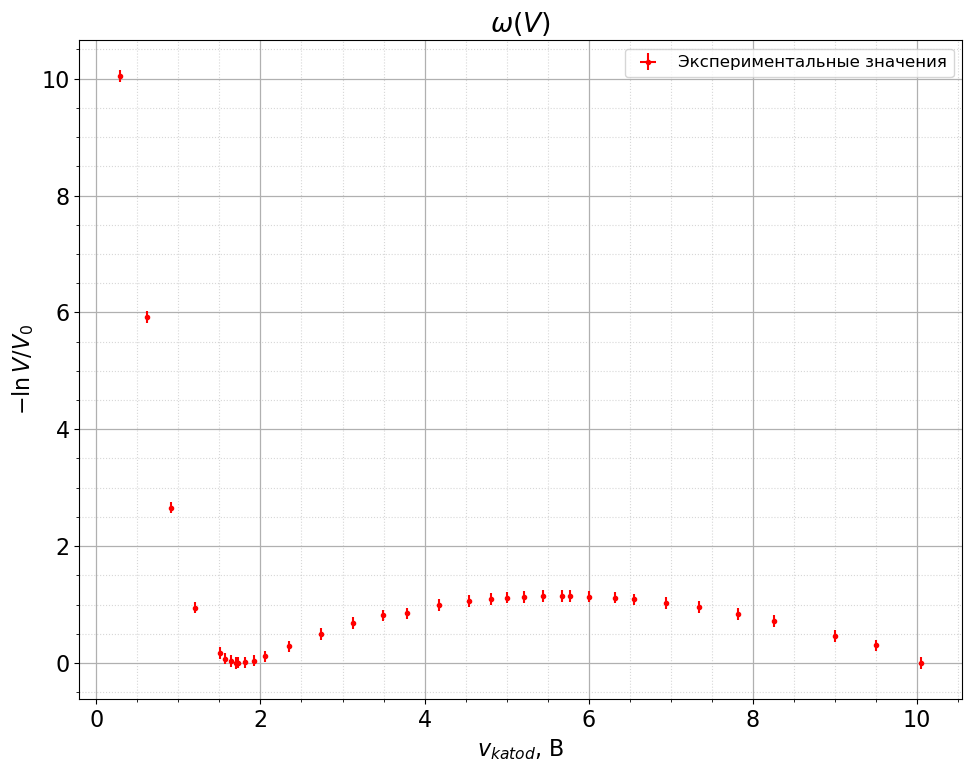

In [280]:
plot_data("w(V)", "$\\omega(V)$", "$v_{katod}$, В", "$-\\ln V/V_0$", [x[0] for x in data], [-np.log2(x[1] / y_max) for x in data], [katod_err] * len(data), [anod_err] * len(data))

In [281]:
E1 = propogate_uncertainty(electron * x_max, [(x_max, x_max_err)])
E2 = propogate_uncertainty(electron * x_min, [(x_min, x_min_err)])

E1d = propogate_uncertainty(electron * Vmax, [(Vmax, 0.4)])
E2d = propogate_uncertainty(electron * Vmin, [(Vmin, 0.4)])

print(E1)
print(E2)

[np.float64(2.8219217871646686e-19), np.float64(6.729142438446693e-21)]
[np.float64(9.024294572121217e-19), np.float64(7.050054324878268e-21)]


In [282]:
l = propogate_uncertainty(h_plank * np.sqrt(5) / (np.sqrt(32 * m_electron * (E2[0] - E1[0]))), [E1, E2])

ld = propogate_uncertainty(h_plank * np.sqrt(5) / (np.sqrt(32 * m_electron * (E2d[0] - E1d[0]))), [E1d, E2d])

print(l)
print(l[1] / l[0])

print(ld)
print(ld[1] / ld[0])

[np.float64(3.4843624385315147e-10), np.float64(8.743332245906108e-12)]
0.02509306193069567
[np.float64(3.3474771373302184e-10), np.float64(8.68128311905451e-11)]
0.25933808545674697


In [283]:
U0 = propogate_uncertainty(4/5 * E2[0] - 9/5 * E1[1], [(4/5 * E1[0], E1[1]), (9/5 * E2[0], E2[1])])
print(U0[0] / electron, U0[1] / electron)
print(U0[1] / U0[0])

U0d = propogate_uncertainty(4/5 * E2d[0] - 9/5 * E1d[1], [(4/5 * E1d[0], E1d[1]), (9/5 * E2d[0], E2d[1])])
print(U0d[0] / electron, U0d[1] / electron)
print(U0d[1] / U0d[0])

4.436444433628083 0.13363354881418005
0.030121767738426466
3.92 1.2341728031210906
0.31484000079619656


In [ ]:
V11 = 11.6

print(V11)

1.856e-18
